## Get forehead using face landmarks

In [22]:
import cv2
import dlib
import matplotlib.pyplot as plt
import pickle

In [23]:
with open('Sources/faces.pickle', 'rb') as handle:
    All_faces = pickle.load(handle)

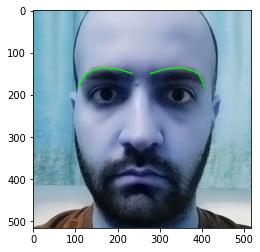

In [24]:
# Load the face detector and facial landmark predictor from Dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('Sources/shape_predictor_68_face_landmarks.dat')
# Replace 'path_to_shape_predictor_68_face_landmarks.dat' with the actual path to the model file

# Load the image of the face
face_image = All_faces[0].copy()
gray = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = detector(gray)

for face in faces:
    # Predict facial landmarks for each detected face
    landmarks = predictor(gray, face)
    
    # Extract eyebrow points (example: points 17-21 for the left eyebrow and 22-26 for the right eyebrow)
    left_eyebrow_pts = [17, 18, 19, 20, 21]  # Example landmark points for the left eyebrow
    right_eyebrow_pts = [22, 23, 24, 25, 26]  # Example landmark points for the right eyebrow
    
    # Get coordinates of the eyebrow points
    left_eyebrow = [landmarks.part(pt) for pt in left_eyebrow_pts]
    right_eyebrow = [landmarks.part(pt) for pt in right_eyebrow_pts]
    
    # Draw lines to visualize the eyebrows on the face image
    for i in range(len(left_eyebrow) - 1):
        cv2.line(face_image, (left_eyebrow[i].x, left_eyebrow[i].y), (left_eyebrow[i + 1].x, left_eyebrow[i + 1].y), (0, 255, 0), 2)
    for i in range(len(right_eyebrow) - 1):
        cv2.line(face_image, (right_eyebrow[i].x, right_eyebrow[i].y), (right_eyebrow[i + 1].x, right_eyebrow[i + 1].y), (0, 255, 0), 2)

# Display the face image with detected eyebrows
plt.imshow(face_image)

In [25]:
# Now that we have the eyebrows' location, getting the forehead is a piece of cake

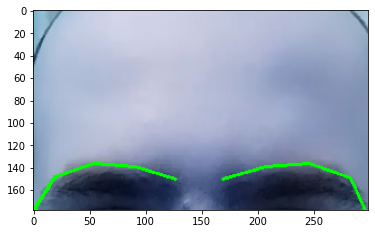

In [26]:
plt.imshow(face_image[:left_eyebrow[0].y,left_eyebrow[0].x:right_eyebrow[-1].x,:])

In [27]:
# apply the same thing on all the 50 images
foreheads = []
for face_image in All_faces:
    gray = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = detector(gray)

    for face in faces:
        # Predict facial landmarks for each detected face
        landmarks = predictor(gray, face)

        # Extract eyebrow points (example: points 17-21 for the left eyebrow and 22-26 for the right eyebrow)
        left_eyebrow_pts = [17, 18, 19, 20, 21]  # Example landmark points for the left eyebrow
        right_eyebrow_pts = [22, 23, 24, 25, 26]  # Example landmark points for the right eyebrow

        # Get coordinates of the eyebrow points
        left_eyebrow = [landmarks.part(pt) for pt in left_eyebrow_pts]
        right_eyebrow = [landmarks.part(pt) for pt in right_eyebrow_pts]
    foreheads.append(face_image[:left_eyebrow[0].y,left_eyebrow[0].x:right_eyebrow[-1].x,:])

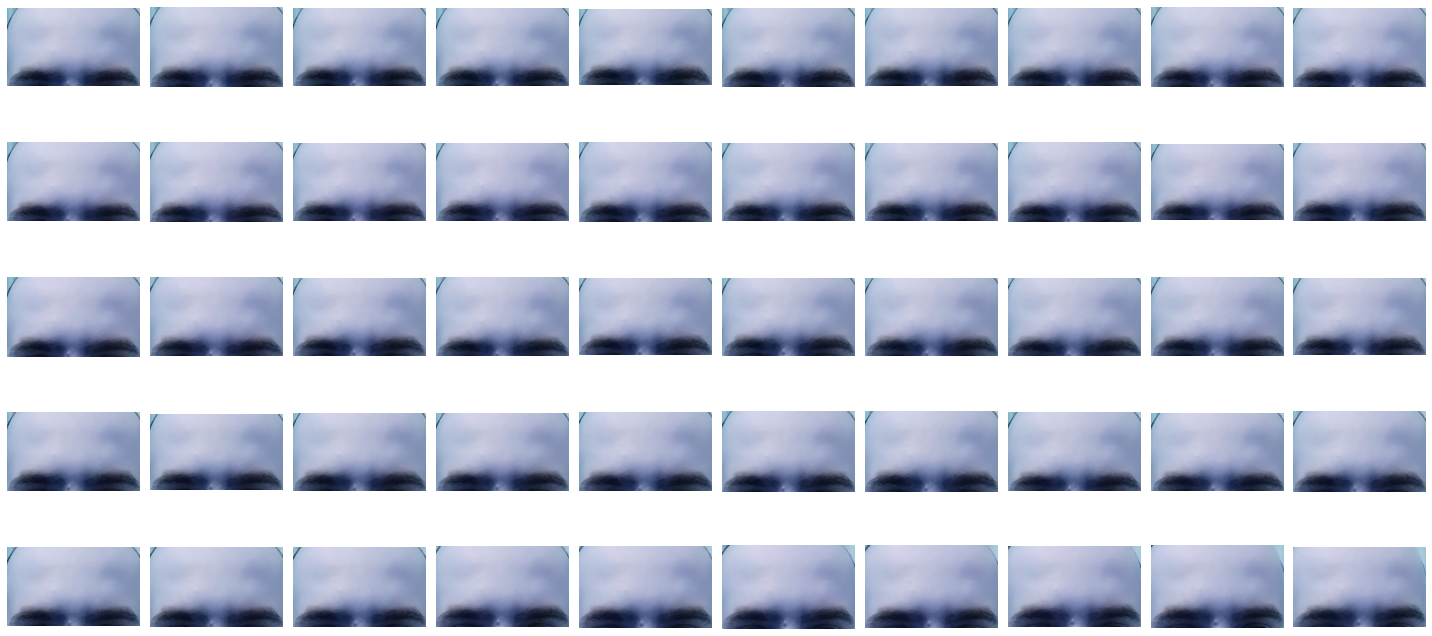

In [28]:
#Let's take a look at all 50 recognizied faces
fig, axs = plt.subplots(5, 10, figsize=(20, 10))  # 5 rows, 10 columns

# Flattening the axes to easily iterate through subplots
axs = axs.flatten()

for i, ax in enumerate(axs):
    ax.imshow(foreheads[i], cmap='gray')  # Displaying each image
    ax.axis('off')  # Turn off axis labels

plt.tight_layout()  # Adjust layout for better presentation
plt.show()

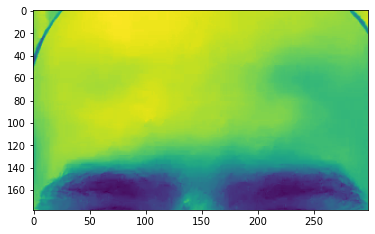

In [14]:
# We need the green channel:
plt.imshow(foreheads[0][:,:,1])

In [29]:
with open('Sources/foreheads.pickle', 'wb') as handle:
    pickle.dump(foreheads, handle)